In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

## 1. 데이터 불러오기

In [2]:
data = pd.read_csv('과제데이터.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
data # 10886, 12 형태의 데이터 // target : count

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### 범주형 데이터 

In [5]:
print('season distribution : {}'.format(dict(data.season.value_counts())))
print('holiday ratio : {}'.format(round(sum((data.holiday == 1))/len(data), 2)))
print('workingday ratio : {}'.format(round(sum((data.workingday == 1))/len(data), 2)))
print('weather distribution : {}'.format(dict(data.weather.value_counts())))


season distribution : {4: 2734, 3: 2733, 2: 2733, 1: 2686}
holiday ratio : 0.03
workingday ratio : 0.68
weather distribution : {1: 7192, 2: 2834, 3: 859, 4: 1}


Variable|Unique|Explanation
:-|:-|:-
season|4|분기를 설명하는 변수이다. 
holiday|2|휴일여부에 대한 변수이다 holiday일 경우 비율을 보면 전체의 약 3%에 해당함을 알 수 있다.
workingday|2| 주말과 휴일이 아닌 경우를 의미한다.
wheather|4|날씨에 대한 변수이다. 1: Clear, Partly cloudy etc 2: Mist, 3: Light Snow, Light Rain, 4: Heavy Rain, Snow

  
- `holiday == True`에 해당하는 비율은 약 3%로 대부분 holiday가 아닌 경우의 데이터가 존재한다. 
- `workingday`는 위의 `holiday`변수와 함께 고려하여 해석할 수 있다. ex) holiday == 0 & workingday == 1 → 주말
-  또한 `weather`이 4인 경우 Heavy Rain은 전체 10886개의 데이터 중에 1개의 데이터만 존재한다. 

## 2. 결측치 확인 & 처리

- 이 데이터에는 따로 nan값이 존재하지 않아 별도로 처리하지 않아도 된다.
- 하지만 windspeed를 확인해 보면 다른 데이터와 동일한 조건에도 불구하고 0인 경우가 다소 존재한다.
- 0인 경우가 전체의 12% 차지하는데 이를 결측치로 생각을 하고 sklearn의 IterativeImputer를 이용하여 결측치를 채운다. 

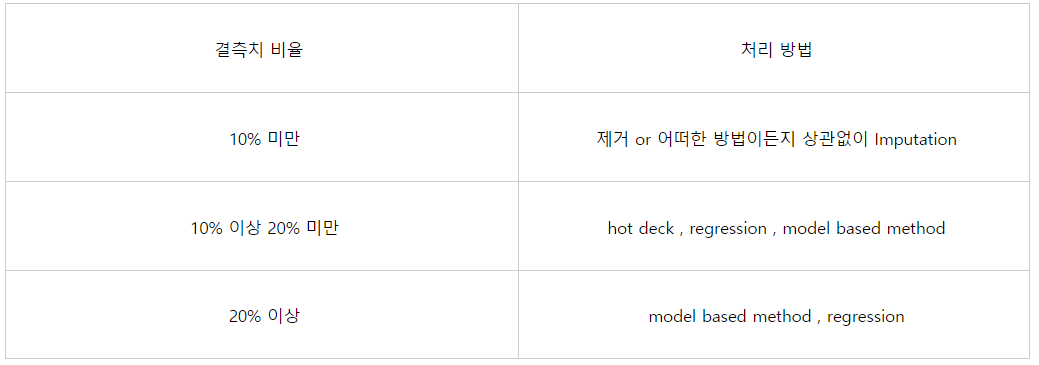

출처 : https://eda-ai-lab.tistory.com/14  / Hair et al. (2006, pp. 49-73)

In [6]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
print(data[110:120])
print('---------------------------------------------------------------------------')
print(data[2772:2783])
print('---------------------------------------------------------------------------')
print('windspeed == 0 인 경우 {}'.format(sum(data.windspeed == 0)))
print('windspeed == 0 인 비율 {}'.format(round(sum(data.windspeed == 0)/len(data),2)))

                datetime  season  holiday  workingday  weather  temp   atemp  \
110  2011-01-05 19:00:00       1        0           1        1  9.84  12.880   
111  2011-01-05 20:00:00       1        0           1        1  9.02  11.365   
112  2011-01-05 21:00:00       1        0           1        1  8.20   9.850   
113  2011-01-05 22:00:00       1        0           1        1  7.38   9.850   
114  2011-01-05 23:00:00       1        0           1        1  8.20  12.880   
115  2011-01-06 00:00:00       1        0           1        1  7.38  12.120   
116  2011-01-06 01:00:00       1        0           1        1  6.56  11.365   
117  2011-01-06 02:00:00       1        0           1        1  6.56  11.365   
118  2011-01-06 04:00:00       1        0           1        2  6.56   9.850   
119  2011-01-06 05:00:00       1        0           1        2  5.74   9.090   

     humidity  windspeed  casual  registered  count  
110        38     7.0015       5         127    132  
111        

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
test = data.copy()
test['windspeed'].replace(0, np.nan,inplace = True)
test = test[['season', 'weather', 'temp','atemp','humidity','windspeed']]
test

,season,weather,temp,atemp,humidity,windspeed
0,1,1,9.84,14.395,81,NaN
1,1,1,9.02,13.635,80,NaN
2,1,1,9.02,13.635,80,NaN
3,1,1,9.84,14.395,75,NaN
4,1,1,9.84,14.395,75,NaN
...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027
10882,4,1,14.76,17.425,57,15.0013
10883,4,1,13.94,15.910,61,15.0013
10884,4,1,13.94,17.425,61,6.0032


In [10]:
imp = IterativeImputer(random_state= 1, missing_values= np.nan, n_nearest_features= 5, initial_strategy= 'constant')

result = imp.fit(test).transform(test)
result = pd.DataFrame(data=result, columns= test.columns)

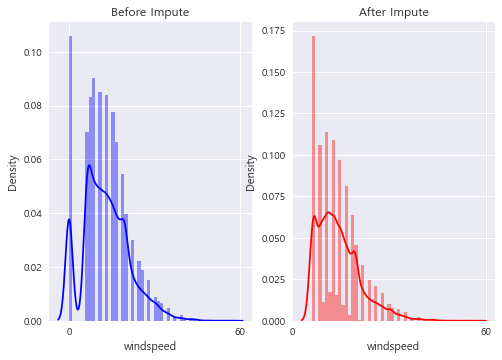

In [11]:
plt.subplot(1,2,1)
plt.title("Before Impute")
plt.xticks([0,60])
sns.distplot(data['windspeed'], color = 'blue')

plt.subplot(1,2,2)
plt.title("After Impute")
sns.distplot(result['windspeed'], color = 'red')
plt.xticks([0,60])
plt.show()

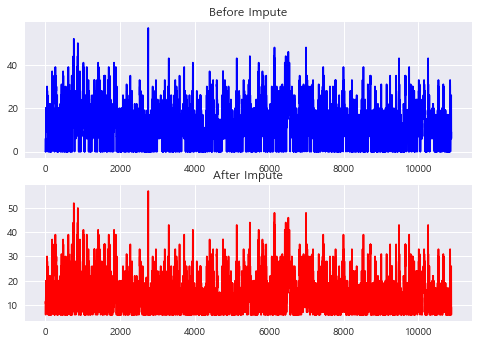

In [14]:
plt.subplot(2,1,1)
plt.title("Before Impute")
plt.plot(data['windspeed'], color = 'blue')

plt.subplot(2,1,2)
plt.title("After Impute")
plt.plot(result['windspeed'], color = 'red')
plt.show()

- sklearn에서 제공하는 IterativeImputer를 이용하여 주변 변수를 반영하여 결측치를 채운 결과 분포의 양상을 띄게 되었다.

In [15]:
data[['season','weather','temp','atemp','humidity','windspeed']] = result

In [16]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
print(data[110:120])
print('---------------------------------------------------------------------------')
print(data[2772:2783])
print('---------------------------------------------------------------------------')

                datetime  season  holiday  workingday  weather  temp   atemp  \
110  2011-01-05 19:00:00     1.0        0           1      1.0  9.84  12.880   
111  2011-01-05 20:00:00     1.0        0           1      1.0  9.02  11.365   
112  2011-01-05 21:00:00     1.0        0           1      1.0  8.20   9.850   
113  2011-01-05 22:00:00     1.0        0           1      1.0  7.38   9.850   
114  2011-01-05 23:00:00     1.0        0           1      1.0  8.20  12.880   
115  2011-01-06 00:00:00     1.0        0           1      1.0  7.38  12.120   
116  2011-01-06 01:00:00     1.0        0           1      1.0  6.56  11.365   
117  2011-01-06 02:00:00     1.0        0           1      1.0  6.56  11.365   
118  2011-01-06 04:00:00     1.0        0           1      2.0  6.56   9.850   
119  2011-01-06 05:00:00     1.0        0           1      2.0  5.74   9.090   

     humidity  windspeed  casual  registered  count  
110      38.0   7.001500       5         127    132  
111      47

- `weather`를 살펴보면 `weather`이 3인 경우 가벼운 눈과 비가 내렸지만 humidity를 보면 0인 데이터가 있다. 일반적으로 생각하였을 때 눈이나 비가 오면 습도가 높다.  weather == 3 & humidity != 0 일 경우의 분포를 확인해 보면 우측으로 치우쳐저 있는 것을 확인 할 수 있다. 또한 11년3월10일에만 발생한 데이터 이므로 weather == 3 & humidity == 0 일 경우는 결측치로 판단할 수 있다.
- 20개의 데이터만 존재하기 때문에 평균값으로 대체한다.

weather이 3이고 humidity 가 0이 아닐때의 평균 습도 :  83.28009535160906


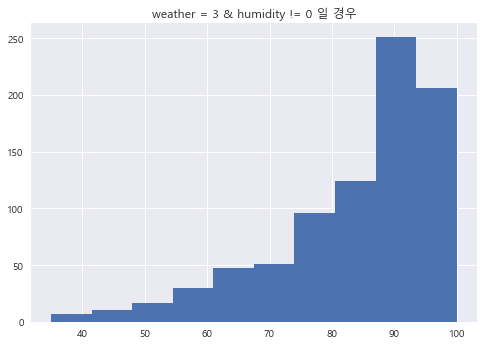

In [18]:
print("weather이 3이고 humidity 가 0이 아닐때의 평균 습도 : ",data.query('weather == 3 & humidity != 0')['humidity'].mean())
plt.title("weather = 3 & humidity != 0 일 경우")
plt.hist(data.query('weather == 3 & humidity != 0')['humidity'])
plt.show()

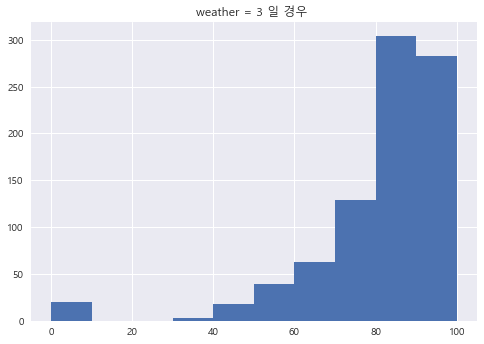

In [19]:
plt.title("weather = 3 일 경우 ")
plt.hist(data.query('weather == 3')['humidity'])
plt.show()

In [20]:
print('weather == 3 & humidity == 0 일 경우 : ',len(data.query('weather == 3 & humidity == 0')))
print("weather이 3이고 humidity 가 0이 아닐때의 평균 습도 : ",data.query('weather == 3 & humidity != 0')['humidity'].mean())
data.query('weather == 3 & humidity == 0')

weather == 3 & humidity == 0 일 경우 :  20
weather이 3이고 humidity 가 0이 아닐때의 평균 습도 :  83.28009535160906


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1.0,0,1,3.0,13.94,15.910,0.0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1.0,0,1,3.0,13.94,15.910,0.0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1.0,0,1,3.0,13.94,15.910,0.0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1.0,0,1,3.0,14.76,17.425,0.0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1.0,0,1,3.0,14.76,16.665,0.0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1.0,0,1,3.0,15.58,19.695,0.0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1.0,0,1,3.0,15.58,19.695,0.0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1.0,0,1,3.0,16.40,20.455,0.0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1.0,0,1,3.0,16.40,20.455,0.0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1.0,0,1,3.0,16.40,20.455,0.0,16.9979,6,5,11


In [21]:
idx = list(data.query('weather == 3 & humidity == 0')['humidity'].index)
data.loc[idx, 'humidity'] = data.query('weather == 3 & humidity != 0')['humidity'].mean()

### 수치형 변수간의 관계

In [51]:
from scipy.stats import skew, kurtosis
from scipy.special import boxcox1p

In [22]:
num_columns = ['temp','atemp','humidity','windspeed','casual','registered','count']

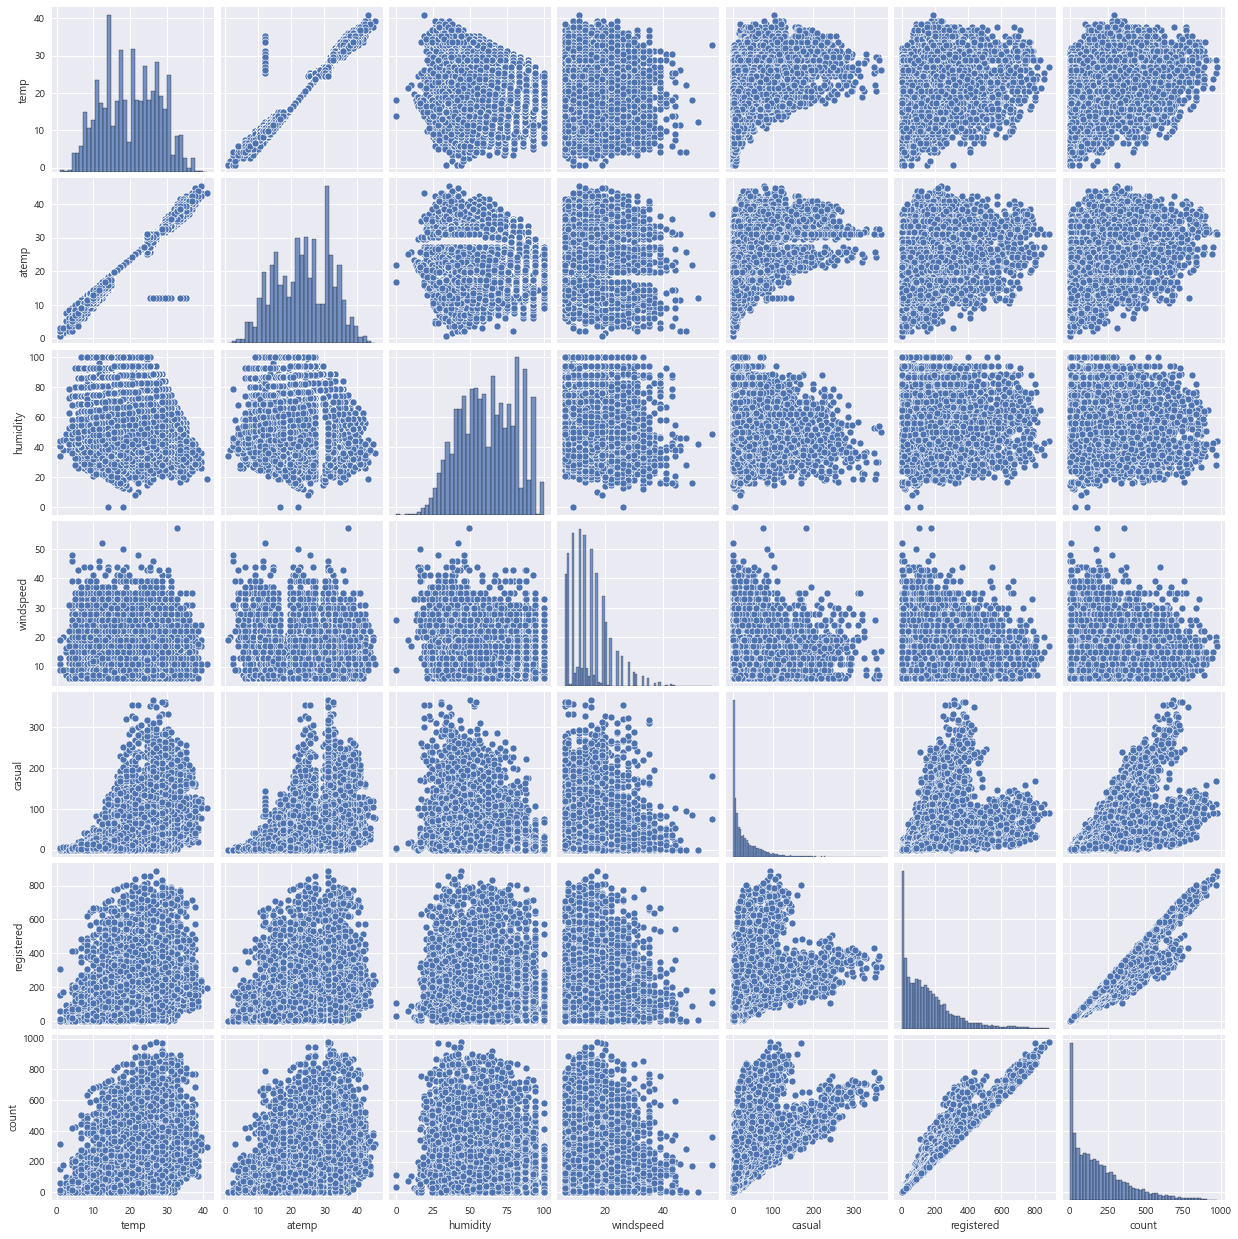

In [23]:
sns.pairplot(data[num_columns])
plt.show()

#### 데이터 왜도 , 첨도 확인

In [54]:
n_columns = ['temp', 'atemp','humidity','windspeed','casual','registered', 'count']

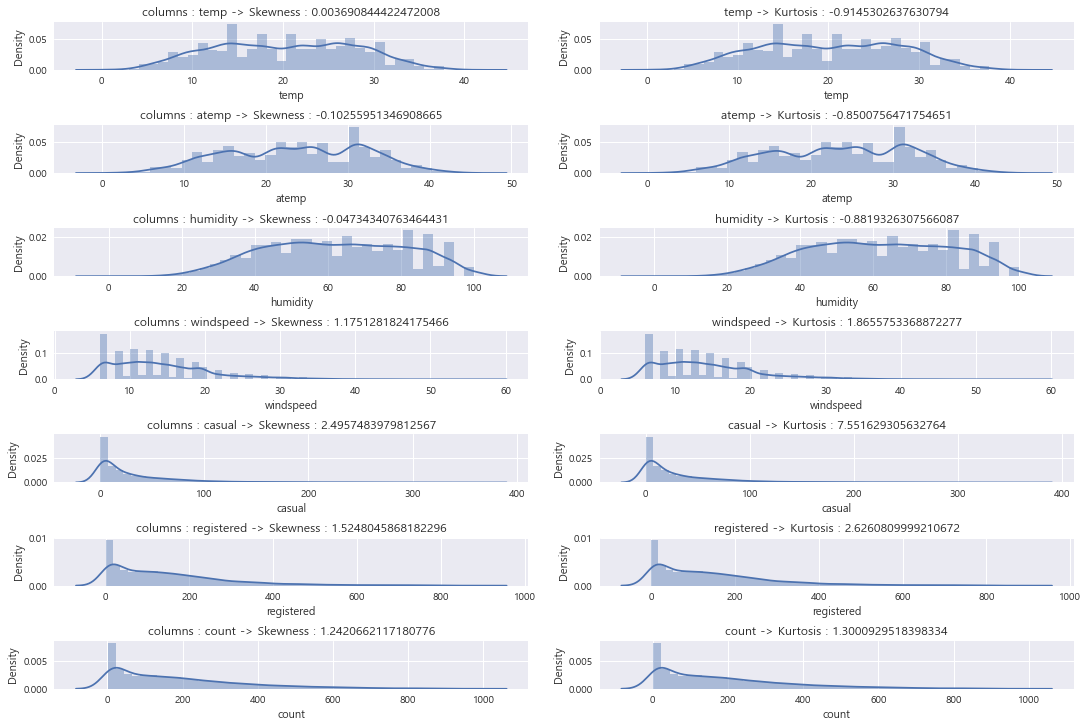

In [76]:
f, axes = plt.subplots(7,2 ,figsize = (15,10), constrained_layout = True)
i = 0
for column in n_columns :
    for j in range(2) :
        sns.distplot(data[column], ax = axes[i][j])
        if j == 0 :
            axes[i][j].set_title("columns : {} -> Skewness : {}".format(column, data[column].skew()))
        else :
            axes[i][j].set_title("{} -> Kurtosis : {}".format(column, data[column].kurt()))
            
    
    i += 1
plt.show()

- scatter plot을 확인한 결과 `temp` 와 `atemp` , `registered` 와 `count` 간의 관계가 강한 선형성을 띈다. 이는 추후에 따로 처리를 해야한다.
- `windspeed` 의 경우 그래프가 왼쪽으로 치우쳐진 모습을 보이지만 왜도를 확인해 보면 -2 ~ +2 사이 값, 첨도의 절대값이 7보다 작으므로 별도의 처리는 하지 않는다.
- `casual`의 경우 왜도와 첨도가 정상분포에서 벗어난 모양을 확인할 수 있다. 하지만 target값인 `count`와 관련된 변수이므로 따로 처리하지 않는다.

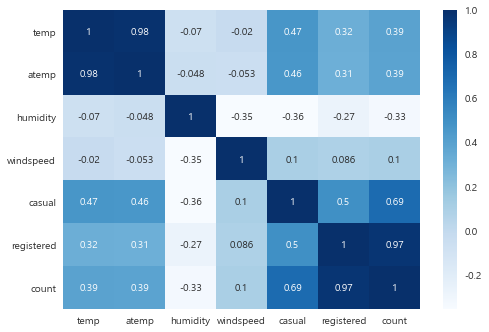

In [301]:
sns.heatmap(data[num_columns].corr(), cmap = 'Blues', annot = True)
plt.show()

- `count` 와 상관관계가 강한 변수는 `casual`과 `registered`로 보이는데 `count` = `casual` + `registered` 이므로 높을 수 밖에 없다. 
<br>
- 또한 `temp`와 `atemp`의 상관관계가 높은것으로 보아 두 변수간의 의미는 동일하다고 볼 수 있으므로 **다중공선성**을 고려하여 둘 중 하나의 변수만 사용을 해야한다.

## 3. Visualizing & Feature engineering

#### 1. 시간 범주화 단위별 count 비율  - 1시간 단위 hour

--- 
밑의 그래프는 시간을 8시간,6시간,1시간 단위로 나누어 범주화를 진행한 후 count의 비율을 보여준다. 8시간을 기준으로 할 때 와 6시간을 기준으로 할 경우, 1시간을 기준으로 할 경우 분포를 확인해 보면 8시간 6시간의 경우 경향성을 보여주지만 1시간을 기준으로 할 경우를 확인해 보면 새벽에 감소하다 8시 기점으로 상승하고 다시 감소하고 저녁이 될 때 증가하는 모습을 볼 수 있다. 따라서 `hour`이라는 변수를 추가한다.

In [79]:
data['datetime'] = pd.to_datetime(data['datetime'], format="%Y-%m-%d %H", errors = 'raise')
data['hour'] = data['datetime'].dt.hour

In [87]:
ff = data.copy()

In [239]:
ff['month'] = ff['datetime'].dt.month

ff['year'] = ff['datetime'].dt.year

ff['date'] = ff['datetime'].dt.date


In [81]:
def hour_binning_8(x) :
    if 0<x<= 8 :
        return 0
    elif 8<x<= 16 :
        return 1
    else :
        return 2

In [86]:
def hour_binning_6(x) :
    if 0<x<= 6 :
        return 0
    elif 6<x<= 12 :
        return 1
    elif 12< x <= 18 :
        return 2
    else :
        return 3

In [88]:
ff['time_binning_8'] = ff['hour'].apply(hour_binning_8)
ff['time_binning_6'] = ff['hour'].apply(hour_binning_6)

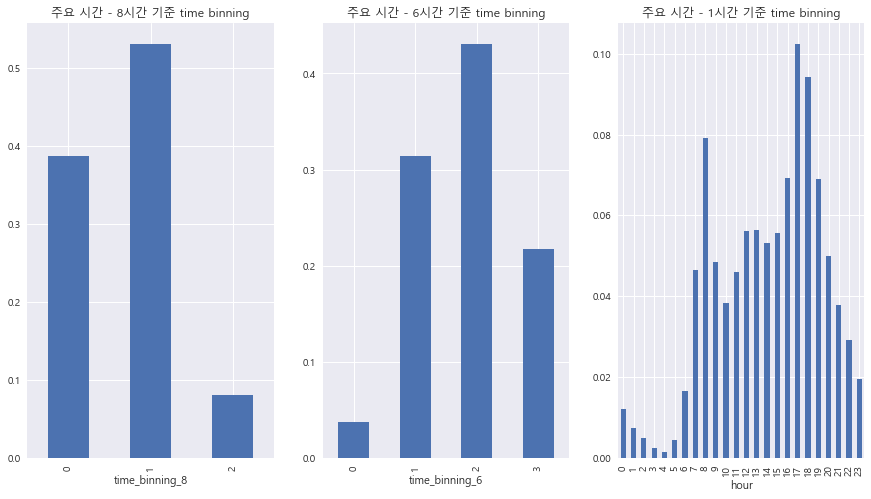

In [99]:
#plt.title("time binning 별 count ratio", fontsize = 20)
f , axes = plt.subplots(1,3, figsize = (15,8))
(ff.groupby('time_binning_8')['count'].apply(lambda x : x.sum())/sum(ff['count'])).plot(kind = 'bar', ax = axes[0])
axes[0].set_title("주요 시간 - 8시간 기준 time binning")
(ff.groupby('time_binning_6')['count'].apply(lambda x : x.sum())/sum(ff['count'])).plot(kind = 'bar', ax = axes[1])
axes[1].set_title("주요 시간 - 6시간 기준 time binning")
(ff.groupby('hour')['count'].apply(lambda x: x.sum())/sum(ff['count'])).plot(kind = 'bar', ax = axes[2])
axes[2].set_title("주요 시간 - 1시간 기준 time binning")
plt.show()

In [100]:
data['hour'] = data['datetime'].dt.hour

#### 2. temp, atemp 와 count의 관계 

-----------------
- temp 와 atemp의 상관관계는 매우 높은 값을 가진다. temp와 count의 관계를 보면 전반적으로 깔끔한 분포의 모습을 보이는 반면에 atemp의 경우에는 outlier 가 존재하므로 temp의 범위를 binning하여 변수를 만든다.
- binning 한 결과 temp가 높을수록 count가 높아짐을 알 수 있다.

In [255]:
a = ff.groupby('temp')['count'].agg([('temp_sum', 'sum')]).reset_index()

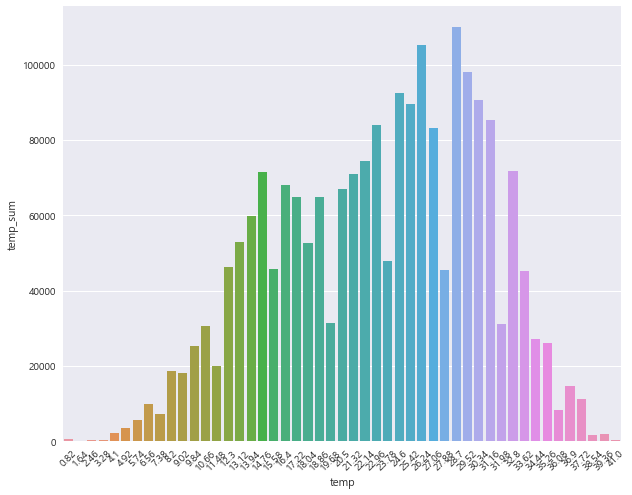

In [256]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'temp', y = 'temp_sum', data = a)
plt.xticks(rotation = 45)
plt.show()

In [257]:
a = ff.groupby('atemp')['count'].agg([('atemp_sum', 'sum')]).reset_index()

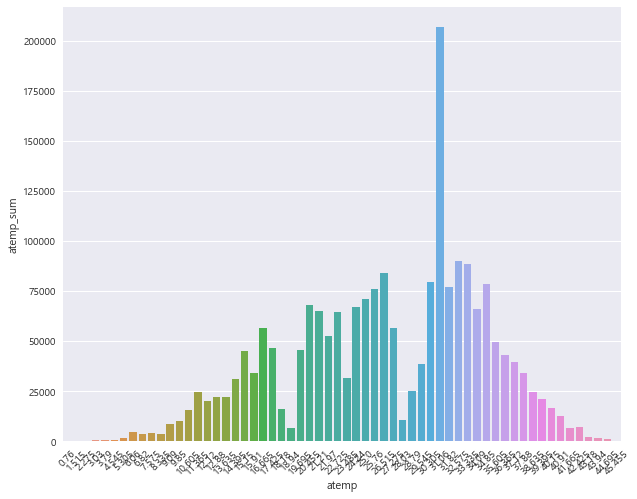

In [258]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'atemp', y = 'atemp_sum', data = a)
plt.xticks(rotation = 45)
plt.show()

In [274]:
ff['cut'] =  pd.qcut(ff.temp,5)
ff.groupby('cut')['count'].mean().to_frame().style.background_gradient(cmap = 'Blues')

,count
cut,
"(0.819, 13.12]",96.322324
"(13.12, 17.22]",164.068218
"(17.22, 22.96]",186.304057
"(22.96, 27.88]",224.393324
"(27.88, 41.0]",308.246542


In [275]:
def cut(x) :
    if 0.819<x <= 13.12 :
        return 0
    elif 13.12 < x <= 17.22:
        return 1 
    elif 17.22 < x <= 22.96 :
        return 2 
    elif 22.96 < x <= 27.88 :
        return 3 
    else :
        return 4

In [276]:
data['temp_cut'] = data['temp'].apply(cut)

#### 3. humidity 와 count의 관계

- humidity와 count의 관계를 확인해 보면 전반적으로 분포의 모양을 보이는것을 확인 할 수 있다. 또한 humidity를 binning한 결과 humidity가 낮을수록 count가 높아짐을 확인 할 수 있다.

In [280]:
a = ff.groupby('humidity')['count'].agg([('h_sum', 'sum')]).reset_index()

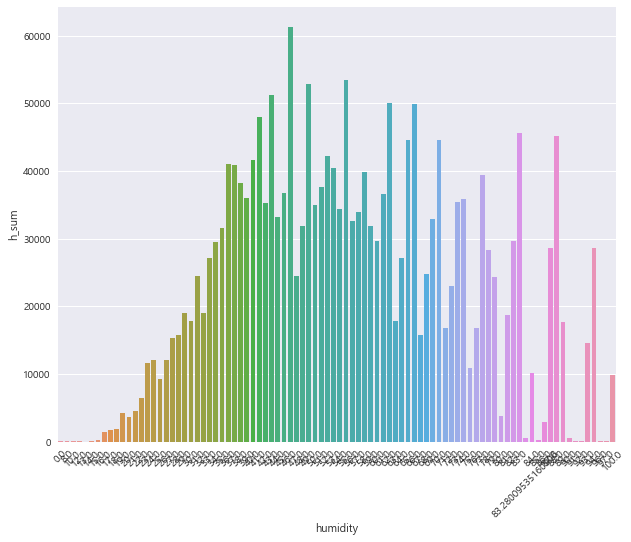

In [282]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'humidity', y = 'h_sum', data = a)
plt.xticks(rotation = 45)
plt.show()

In [284]:
ff['cut_h'] =  pd.qcut(ff.humidity,5)
ff.groupby('cut_h')['count'].mean().to_frame().style.background_gradient(cmap = 'Blues')

,count
cut_h,
"(-0.001, 44.0]",278.539272
"(44.0, 56.0]",214.597333
"(56.0, 68.0]",197.880906
"(68.0, 81.0]",152.165825
"(81.0, 100.0]",109.162942


In [285]:
def cut_h(x) :
    if -0.001<x <= 44.0 :
        return 0
    elif 44.0 < x <= 56.0:
        return 1 
    elif 56.0 < x <= 68.0 :
        return 2 
    elif 68.0 < x <= 81.0 :
        return 3 
    else :
        return 4

In [286]:
data['humi_cut'] = data['humidity'].apply(cut)

#### 4. year 특성 
----
이 데이터는 2011년1월부터 2012년 12월까지의 데이터가 존재한다. 이러한 시계열 특성을 이용하여 시간의 흐름에 따른 `count`의 변화량을 확인해 보면 비슷한 경향을 보이며, 2011년보다 2012년의 경우에 항상 증가하는 모습을 보인다. 따라서 2011년을 0, 2012년을 1로 category의 변수를 생성한다.

In [194]:
for i in range(1,13) :
    print("year = 2011 : ",ff.query('year == 2011 & month == @i')['count'].mean())
    print("year = 2012 : ", ff.query('year == 2012 & month == @i')['count'].mean())

year = 2011 :  54.64501160092807
year = 2012 :  124.3532008830022
year = 2011 :  73.64125560538116
year = 2012 :  145.64615384615385
year = 2011 :  86.84977578475336
year = 2012 :  208.27692307692308
year = 2011 :  111.02637362637363
year = 2012 :  257.45594713656385
year = 2011 :  174.80921052631578
year = 2012 :  264.109649122807
year = 2011 :  196.87719298245614
year = 2012 :  287.18640350877195
year = 2011 :  203.6140350877193
year = 2012 :  267.0372807017544
year = 2011 :  182.66666666666666
year = 2012 :  285.5701754385965
year = 2011 :  174.6225165562914
year = 2012 :  292.5986842105263
year = 2011 :  174.77362637362637
year = 2012 :  280.50877192982455
year = 2011 :  155.45833333333334
year = 2012 :  231.98021978021978
year = 2011 :  134.1732456140351
year = 2012 :  217.0548245614035


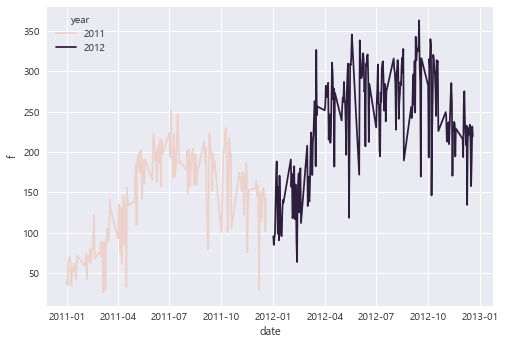

In [201]:
a = ff.groupby(['date','year'])['count'].agg([('f','mean')]).reset_index()

sns.lineplot(x = 'date', y = 'f', data = a, hue = 'year')
plt.show()

In [197]:
data['year']= data['datetime'].dt.year
data['year'] = data['year'].apply(lambda x : 1 if x == 2012 else 0)

#### 5. 계절 특성 
----
기존의 season 변수는 분기를 의미하므로 month를 나누어 봄, 여름, 가을, 겨울을 지정해준다. 그리고 bar plot을 그렸을 경우 계절별로 다른 양상을 띄우는것을 알 수 있다.

In [204]:
def season_fe(x) :
    if x in [12,1,2] :
        return '겨울'
    elif x in [3,4,5] :
        return '봄'
    elif x in [6,7,8] :
        return '여름'
    else :
        return '가을'

In [209]:
ff['season_fe'] = ff['month'].apply(season_fe)

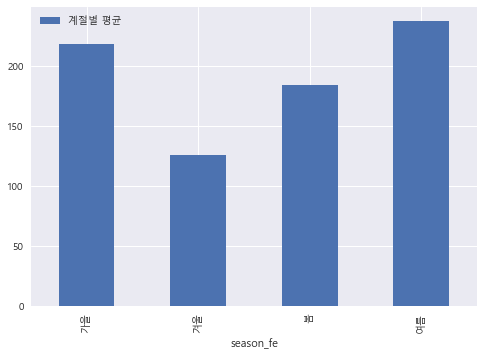

In [215]:
ff.groupby('season_fe')['count'].agg([('계절별 평균','mean')]).plot(kind ='bar')
plt.show()

In [218]:
data['month'] = data['datetime'].dt.month 
data['season_fe'] = data['month'].apply(season_fe)
data.drop(columns ='month', axis = 1 , inplace = True)